# Ridge

In [165]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
K = ones(n2, n2);
K_test = ones(n2, n2);

for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 6);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega,lambda, y) 1/n * norm(f(omega) - y)+lambda*norm(omega);
gradJ = @(omega,lambda)(1/n)* K' * ((K * omega) - y_train)+lambda*eye(n2)*omega;

### Utilisation de gradient décent 

pour $\lambda = 0.9$(une grande valeur de $\lambda$)

In [166]:
alpha = 1;
omega = 0.1+zeros(n2, 1);
lambda=1.9;
num_iterations = 50000;
while (norm(gradJ(omega,lambda)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega,lambda);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega,lambda, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega,lambda)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 5.635145e-14
Nombre d'iteration : 177


##### Affichage Risque empirique  

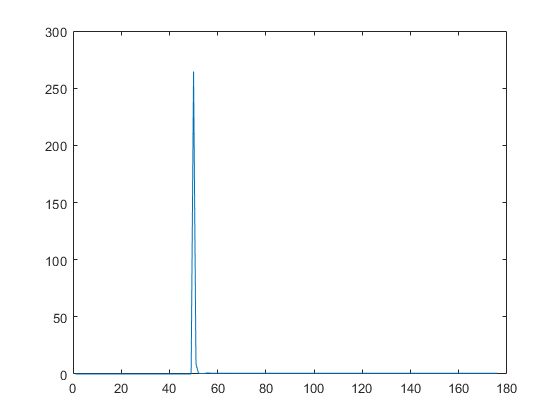

In [167]:
plot(1:i-1, err)

#### Sur les données d’entraînement : 


ans =

    0.6137




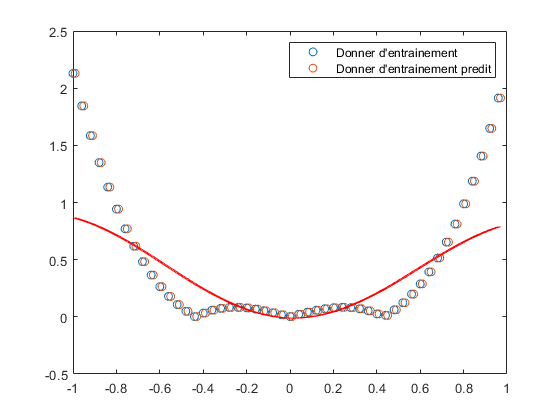

In [168]:

opt_omega = omega;
J(opt_omega,lambda ,y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


#### Sur les données de test  :


err_rela =

    0.8303




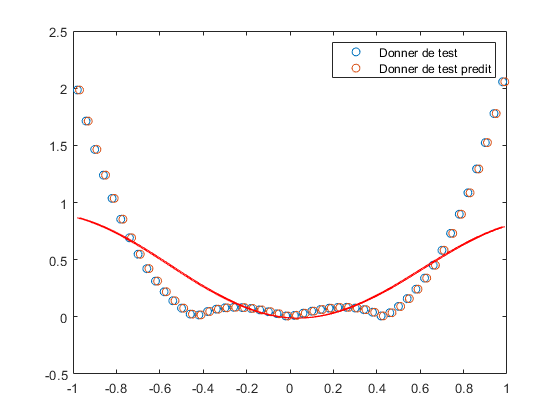

In [169]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
y_test = modele(4, X_test);
y_test_predit = K * opt_omega;
err_rela = norm(y_test  - y_test_predit) / norm(y_test_predit)
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

pour $\lambda = 0.001$(une petite valeur de $\lambda$)

In [170]:
alpha = 1;
omega = 0.1+zeros(n2, 1);
lambda=0.001;
num_iterations = 50000;
while (norm(gradJ(omega,lambda)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega,lambda);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega,lambda, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega,lambda)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 3.490320e-14
Nombre d'iteration : 1823


##### Affichage Risque empirique  

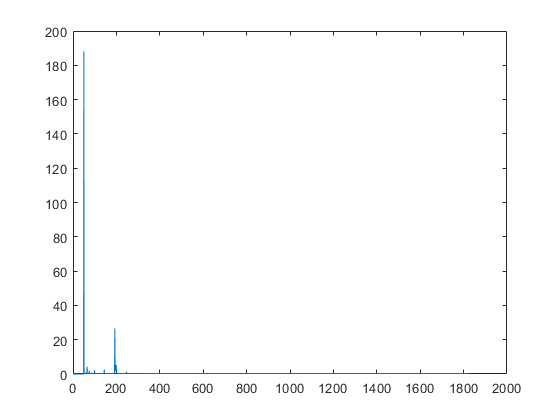

In [171]:
plot(1:i-1, err)

#### Sur les données d’entraînement : 


ans =

    0.2978




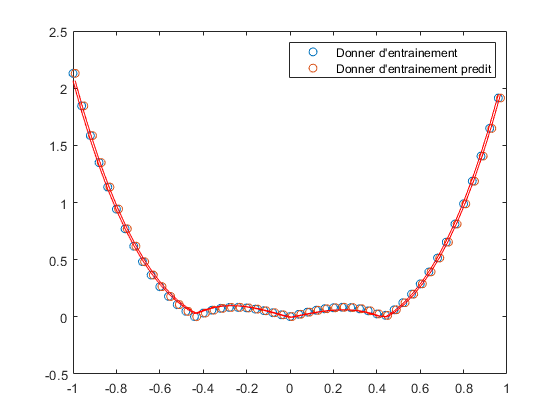

In [172]:

opt_omega = omega;
J(opt_omega,lambda ,y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


#### Sur les données de test  :


err_rela =

    0.0734




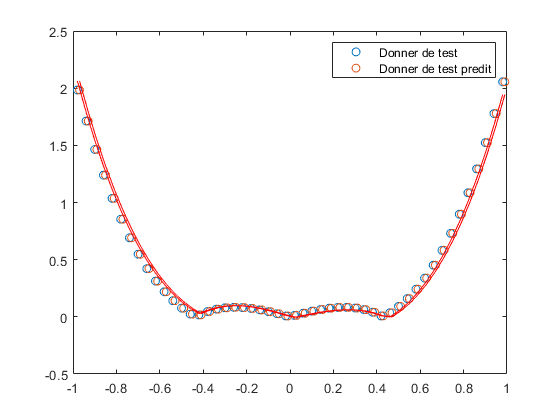

In [173]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
y_test = modele(4, X_test);
y_test_predit = K * opt_omega;
err_rela = norm(y_test  - y_test_predit) / norm(y_test_predit)
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

Pour une valeur de $\lambda$ élevée (1.9), l'algorithme a convergé rapidement (177 itérations), mais avec une erreur relative assez importante (0.8303) par rapport à celle que l'on obtient (0.0734) avec un $\lambda$ plus petit (0.001) en 1823 itérations.

# Lasso

In [99]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = 0.1+zeros(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
gama=0.001;
lambda= 0.001;
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 6);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y)+lambda*sum(abs(omega));
gradJ = @(omega)(1/n)* K' * ((K * omega) - y_train)+lambda*sign(omega)*gama;

In [100]:
alpha = 1;
num_iterations = 50000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 9.846662e-14
Nombre d'iteration : 1875



ans =

    0.3052




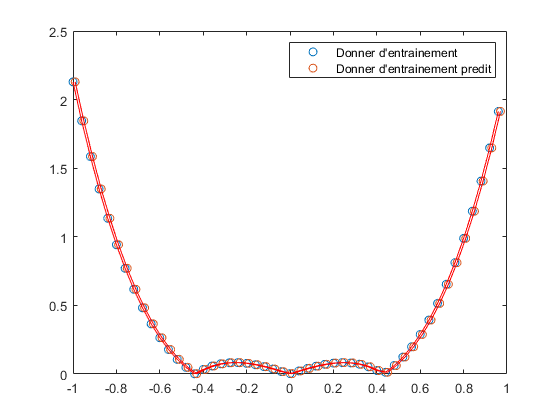

In [101]:

opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off



err_rela =

    0.0853




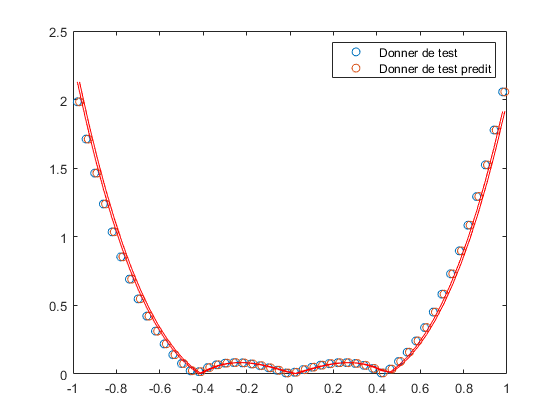

In [102]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
y_test = modele(4, X_test);
y_test_predit = K * opt_omega;
err_rela = norm(y_test  - y_test_predit) / norm(y_test_predit)
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

# Elastic net

In [103]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = 0.1+zeros(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
gama=0.001;
lambda1= 0.001;
lambda2= 0.001;
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 6);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y)+lambda1*norm(omega)+lambda2*sum(abs(omega));
gradJ = @(omega)(1/n)* K' * ((K * omega) - y_train)+lambda1*eye(n2)*omega+lambda2*sign(omega)*gama;

In [104]:
alpha = 1;
num_iterations = 50000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 7.930433e-14
Nombre d'iteration : 1752



ans =

    0.3045




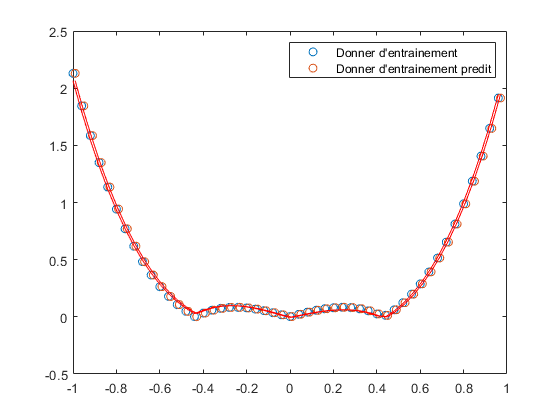

In [105]:

opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off



err_rela =

    0.0734




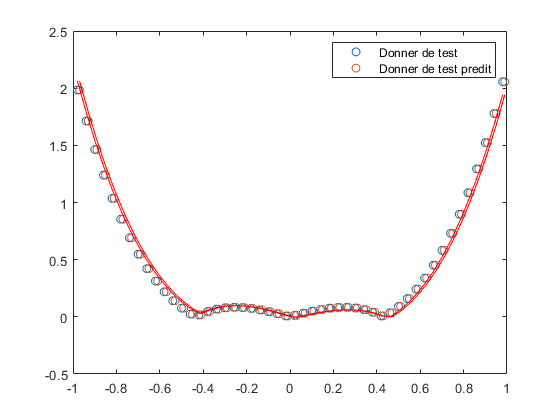

In [106]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
y_test = modele(4, X_test);
y_test_predit = K * opt_omega;
err_rela = norm(y_test  - y_test_predit) / norm(y_test_predit)
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off